# Aims and objectives

## Briefing

**Context:** a loan *default* occurs when a borrower *fails* to make required payments on a debt. Defaults can occur on secured debt i.e. mortgage loan secured by house, or on unsecured debt such as credit cards and student loans. The debt collectors would need to apply for a CCJ. This whole process is hassle for all parties involved. *We want to investigate the data for the factors that contribute to an entity being unable to repay a loan. The findings will be a deciding factor for whether to approve them for a loan.*

**Task:** perform an in-depth EDA of historical loan data to uncover patterns and trends. Suggestions:
- Univariate analysis
- Bivariate analysis
- Investigate any correlations

## Data Dictionary

[Link](https://docs.google.com/spreadsheets/d/1zeaWMqX_PJRR5ikTsY-bV2Hw7pGArNpZhmlsvUjQI18/edit?gid=461848584#gid=461848584) to the dataset.
* `credit_policy`: Whether the applicant meets basic credit criteria
* `purpose`: The stated purpose of the loan
* `int_rate`: The interest rate assigned to the loan
* `installment`: Monthly payment amount
* `log_annual_inc`: Natural log of the applicant's annual income
* `dti`: Debt-to-income ratio
* `fico`: FICO credit score
* `days_with_cr_line`: Length of credit history
* `revol_bal`: Revolving balance
* `revol_util`: Revolving utilisation rate
* `inq_last_6mths`: Number of credit inquiries in the last 6 months
* `delinq_2yrs`: Number of delinquencies in the past 2 years
* `pub_rec`: Number of derogatory public records
* `not_fully_paid`: Target variable (1 if the loan was not fully paid, 0 if it was)

## Outline

1. Data extraction from Google Sheet and loading into a pandas DataFrame
2. Data cleansing and transformation into meaningful attributes
3. Exploratory data analysis:
   - Identify key metrics within the context of the task
   - Univariate analysis of data distribution
   - Bivariate analysis between attributes to identify correlations
   - Generate meaningful insights from any correlations and data properties
   - Make a suggestion based on the evidence found, relating to the task

# Data Analysis

## Initialisation

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## ETL

### Data extraction and load

In [47]:
df = pd.read_csv('Data_Loan.csv')

Let's have a look at the data.

In [48]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


Let's investigate `credit.policy` for unique values, and remove it if there's just one.

In [49]:
df['credit.policy'].unique()

array([1])

Drop the column.

In [50]:
df = df.drop(labels='credit.policy', axis=1)

Inspect `pub.rec` and `not.fully.paid` for the same reasons.

In [51]:
print(df['pub.rec'].unique())
print(df['not.fully.paid'].unique())

[0 1]
[0 1]


We'll keep them. Finally, let's check for NULL values.

In [52]:
df.isna().any()

purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

This completes our data cleansing process.

### Data transformation

Cast `not.fully.paid` as boolean. More straightforward to debug for higher level languages.

In [53]:
df['not.fully.paid'] = df['not.fully.paid'].astype('bool')
df

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,False
96,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,False
97,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,False
98,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,False


Replace `.` with `_` in the column names as good practise to avoid any syntax collisions.

In [54]:
df.columns = [c.replace(".", "_") for c in list(df.columns)]
df

,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,False
96,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,False
97,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,False
98,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,False


We need to categorise the columns into the following: categorical, continuous and discrete.
- **Categorical:** `purpose`, `not_fully_paid`
- **Continuous:** `int_rate`, `installment`, `log_annual_inc`, `dti`, `days_with_cr_line`, `revol_util`
- **Discrete:** `fico`, `inq_last_6mths`, `delinq_2yrs`, `pub_rec`

Work with these, distinct data sets now.

In [55]:
categorical = pd.DataFrame([df['purpose'],df['not_fully_paid']]).T
continuous = pd.DataFrame([df['int_rate'],df['installment'],df['log_annual_inc'],df['dti'],df['days_with_cr_line'],df['revol_util']]).T
discrete = pd.DataFrame([df['fico'],df['inq_last_6mths'],df['delinq_2yrs'],df['pub_rec']]).T
numerical = continuous.join(discrete)


In [56]:
numerical

,int_rate,installment,log_annual_inc,dti,days_with_cr_line,revol_util,fico,inq_last_6mths,delinq_2yrs,pub_rec
0,0.1189,829.10,11.350407,19.48,5639.958333,52.1,737,0,0,0
1,0.1071,228.22,11.082143,14.29,2760.000000,76.7,707,0,0,0
2,0.1357,366.86,10.373491,11.63,4710.000000,25.6,682,1,0,0
3,0.1008,162.34,11.350407,8.10,2699.958333,73.2,712,1,0,0
4,0.1426,102.92,11.299732,14.97,4066.000000,39.5,667,0,1,0
...,...,...,...,...,...,...,...,...,...,...
95,0.0775,156.11,10.714418,5.00,2131.000000,5.6,762,2,0,0
96,0.1154,329.95,12.323856,20.00,10292.000000,44.8,727,2,0,0
97,0.0807,313.67,12.061047,0.72,8010.000000,5.6,787,3,0,0
98,0.0807,297.99,11.407565,2.44,8717.958333,9.6,792,0,0,0


#### Improved data transformation schema

Converting redundant discrete columns to categorical. Let's look at `inq_last_6mths`, `delinq_2yrs` and `pub_rec` and check the number of unique values for each. We will then be able to determine if these columns are suitable for modelling as categorical data, instead.

In [57]:
for col in ['inq_last_6mths', 'delinq_2yrs', 'pub_rec']:
    print(col, df[col].unique())

inq_last_6mths [0 1 2 3 4]
delinq_2yrs [0 1 2]
pub_rec [0 1]


We can now see clearly that there are distinct categories for each variable. We can now transform the data and update the extracted data sets for them.

In [58]:
categorical = pd.DataFrame([
    df['purpose'],
    df['not_fully_paid'],
    df['inq_last_6mths'].astype("category"),
    df['delinq_2yrs'].astype("category"),
    df['pub_rec'].astype("category")
    ]).T
continuous = pd.DataFrame([
    df['int_rate'],
    df['installment'],
    df['log_annual_inc'],
    df['dti'],
    df['days_with_cr_line'],
    df['revol_util']
    ]).T
discrete = pd.DataFrame([
    df['fico']]
    ).T
numerical = continuous.join(discrete)
categorical

,purpose,not_fully_paid,inq_last_6mths,delinq_2yrs,pub_rec
0,debt_consolidation,False,0,0,0
1,credit_card,False,0,0,0
2,debt_consolidation,False,1,0,0
3,debt_consolidation,False,1,0,0
4,credit_card,False,0,1,0
...,...,...,...,...,...
95,debt_consolidation,False,2,0,0
96,debt_consolidation,False,2,0,0
97,all_other,False,3,0,0
98,all_other,False,0,0,0


## EDA

In [59]:
sns.set_theme()

### Univariate data analysis

#### Statistics

This is only valid for the numerical data.

In [60]:
df.describe()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,0.101028,227.940000,11.079282,9.035000,726.600000,4562.093750,17009.490000,35.50000,0.770000,0.130000,0.060000
std,0.023150,162.367679,0.715795,5.981154,44.854873,2630.856598,22933.459903,26.17237,1.033333,0.393251,0.238683
min,0.071400,32.550000,8.987197,0.000000,627.000000,1110.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.080700,124.745000,10.596635,3.662500,682.000000,2684.968750,3141.750000,14.30000,0.000000,0.000000,0.000000
50%,0.096400,160.615000,11.156251,8.310000,722.000000,4253.979166,6678.500000,31.55000,0.000000,0.000000,0.000000
75%,0.115400,301.910000,11.512925,14.395000,763.250000,5840.000000,22254.500000,53.65000,1.000000,0.000000,0.000000
max,0.159600,829.100000,12.429216,22.090000,812.000000,14008.958330,128000.000000,93.40000,4.000000,2.000000,1.000000


Let's look at the range between the upper quartile and the maximum value; the 75th percentile. This will be a good indicator of any outliers we may need to look back on later. From the above figure, we can observe the following columns have high discrepancies between the 75% and mean values: `installment`, `dti`, `days_with_cr_line`, `revol_bal`, `revo_util`, `inq_last_6mths`. The final columns, `delinq_2yrs` and `pub_rec` are likely due to there being very few distinct values as these resemble the characteristics of categorical data.

#### Distribution

##### Categorical

~~**To-do:** plot converted-categories next to eachother, on the same subplot for each continuous measure.~~

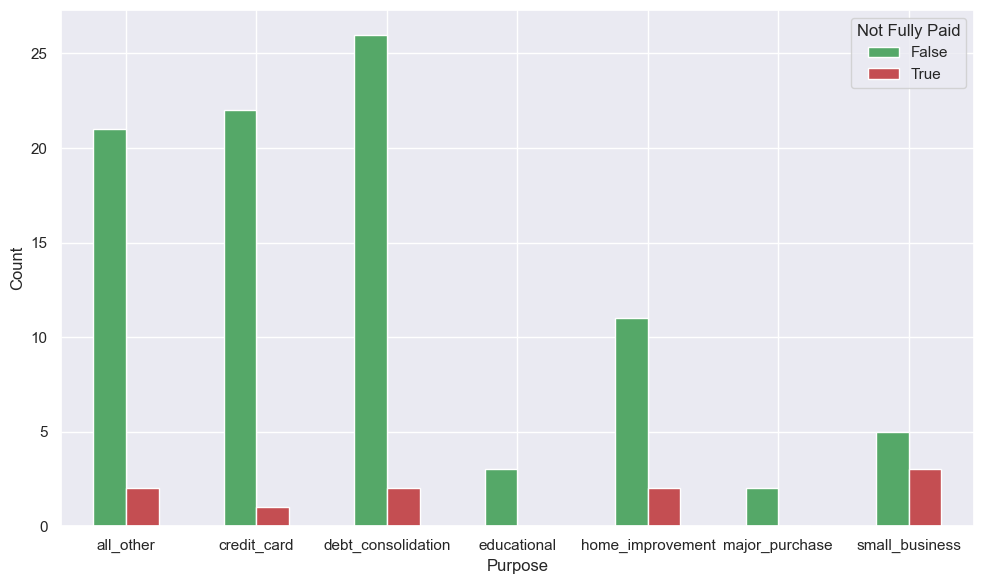

In [61]:
# Example DataFrame
# categorical = pd.DataFrame({
#     'purpose': ['A', 'A', 'B', 'B', 'C', 'C'],
#     'not_fully_paid': [True, False, True, False, True, False]
# })

# Group by 'purpose' and 'not_fully_paid', then count occurrences
data = categorical.groupby(['purpose', 'not_fully_paid']).size().unstack()

# Plot as a grouped bar plot
ax = data.plot(kind='bar', figsize=(10, 6), color=['g', 'r'])

# Add labels and title
#plt.title('Count of Not Fully Paid by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them horizontal
plt.legend(title='Not Fully Paid')
plt.tight_layout()

# Show the plot
plt.show()

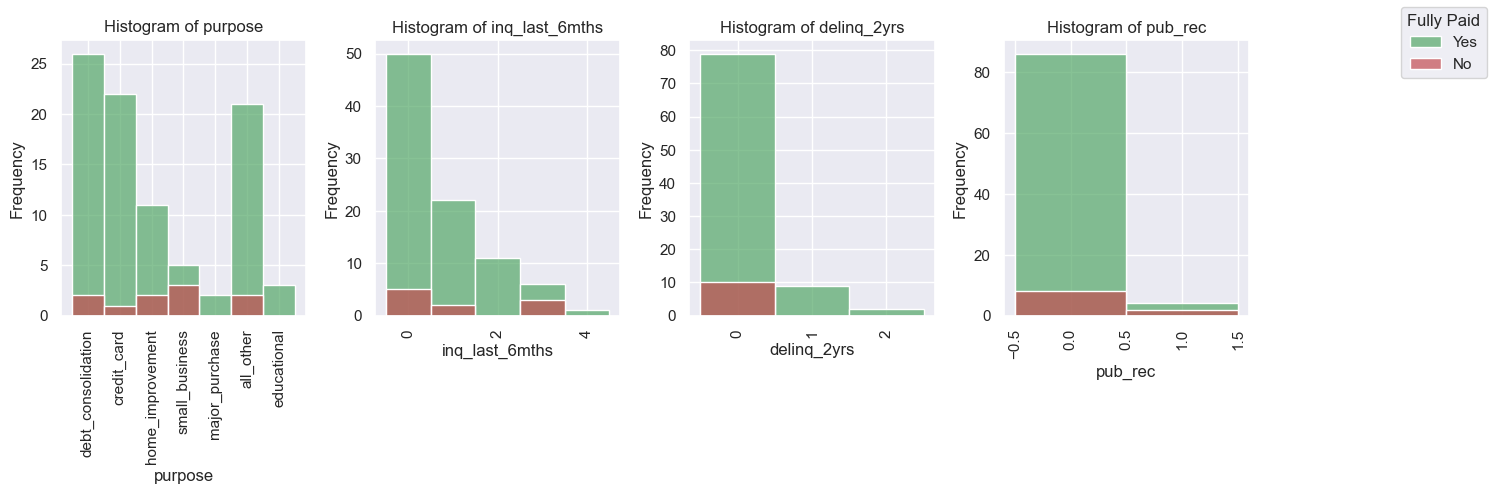

In [63]:
# Define columns to plot
columns = ['purpose', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']

# Define colour palette
palette = {False: 'g', True: 'r'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5), sharey=False)

# Plot each histogram
for ax, col in zip(axes, columns):
    # Plot histograms for each category in 'not_fully_paid'
    sns.histplot(data=df[df['not_fully_paid'] == False], x=col, discrete=True, kde=False, ax=ax, color='g', label='Yes', alpha=0.7)
    sns.histplot(data=df[df['not_fully_paid'] == True], x=col, discrete=True, kde=False, ax=ax, color='r', label='No', alpha=0.7)
    
    # Customize each subplot
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()  # Use handles from the first axis
fig.legend(handles, labels, title='Fully Paid', loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()

##### Numerical

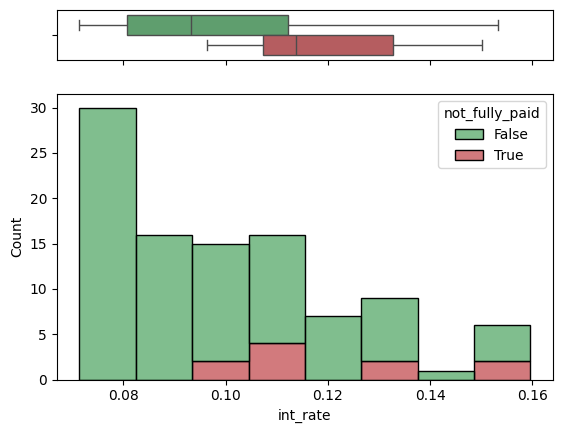

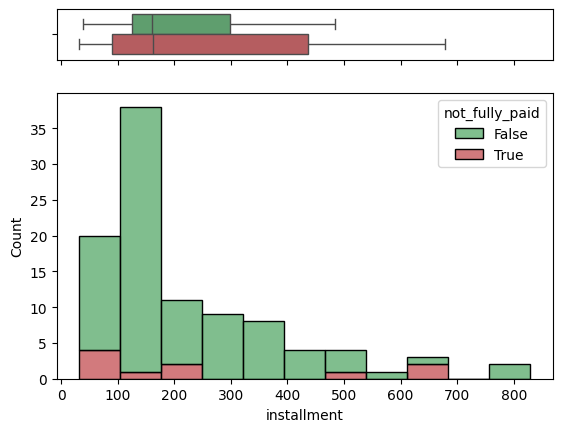

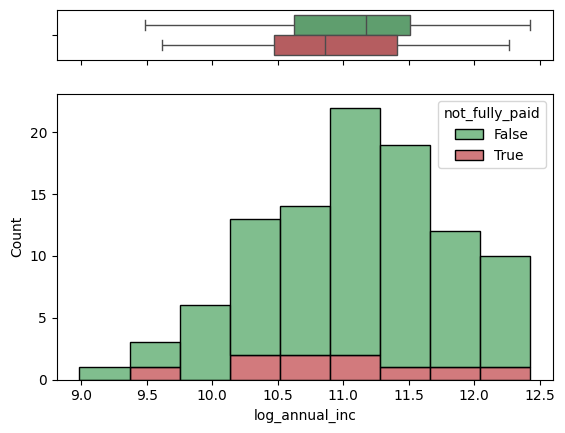

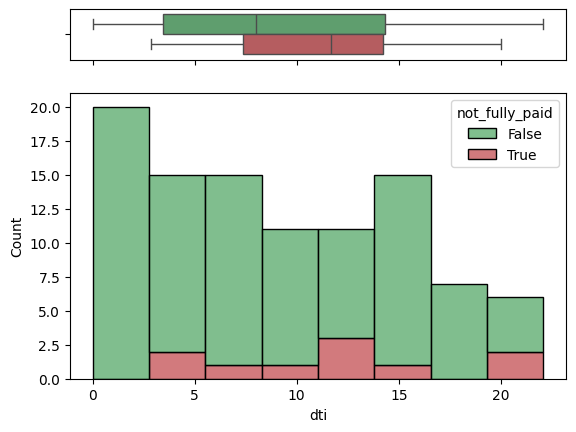

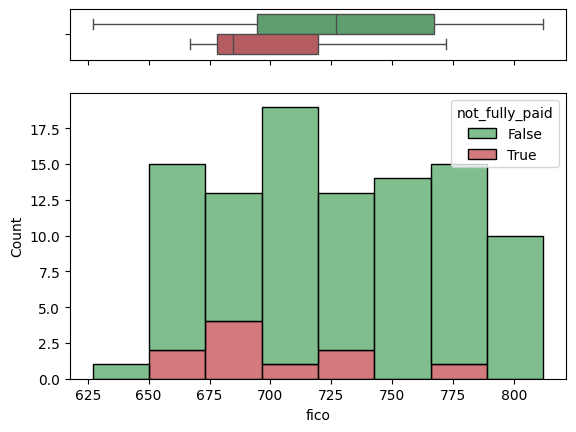

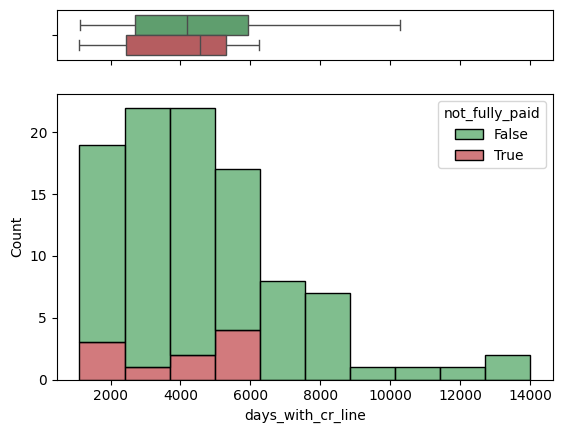

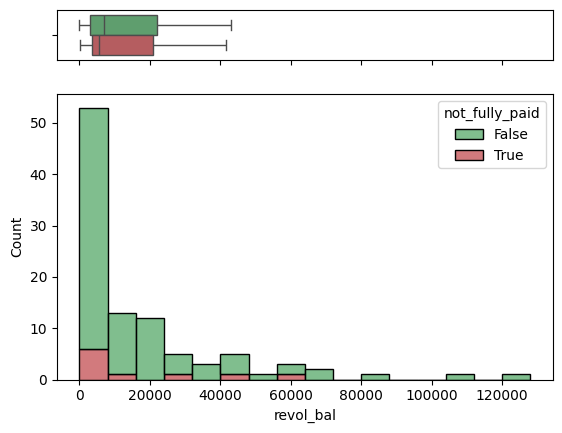

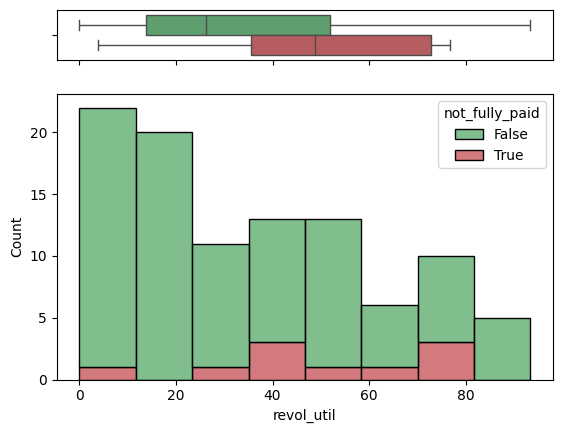

In [92]:
# Define colour palette for 'True' and 'False'
palette = {True: 'r', False: 'g'}

# Iterate only over numerical columns
for col in df.select_dtypes(include=['number']).columns:  # Ensure only numerical columns are used
    if col != 'not_fully_paid' and col not in categorical:  # Skip the grouping column
        # Create figure and axes
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

        # Plot histograms and KDEs for all groups on the lower subplot
        sns.histplot(data=df, x=col, hue='not_fully_paid', multiple='stack', palette=palette, ax=ax_hist, legend=True)
        
        # Plot box plots for all groups on the upper subplot
        sns.boxplot(data=df, x=col, hue='not_fully_paid', palette=palette, ax=ax_box, showfliers=False, legend=False)

        # Set labels and title
        #ax_box.set(ylabel='', title=f'{col} - Box Plot')
        #ax_hist.set(title=f'{col} - Histogram')

        # Display the plot
        plt.show()

### Bivariate data analysis

#### Pair plots

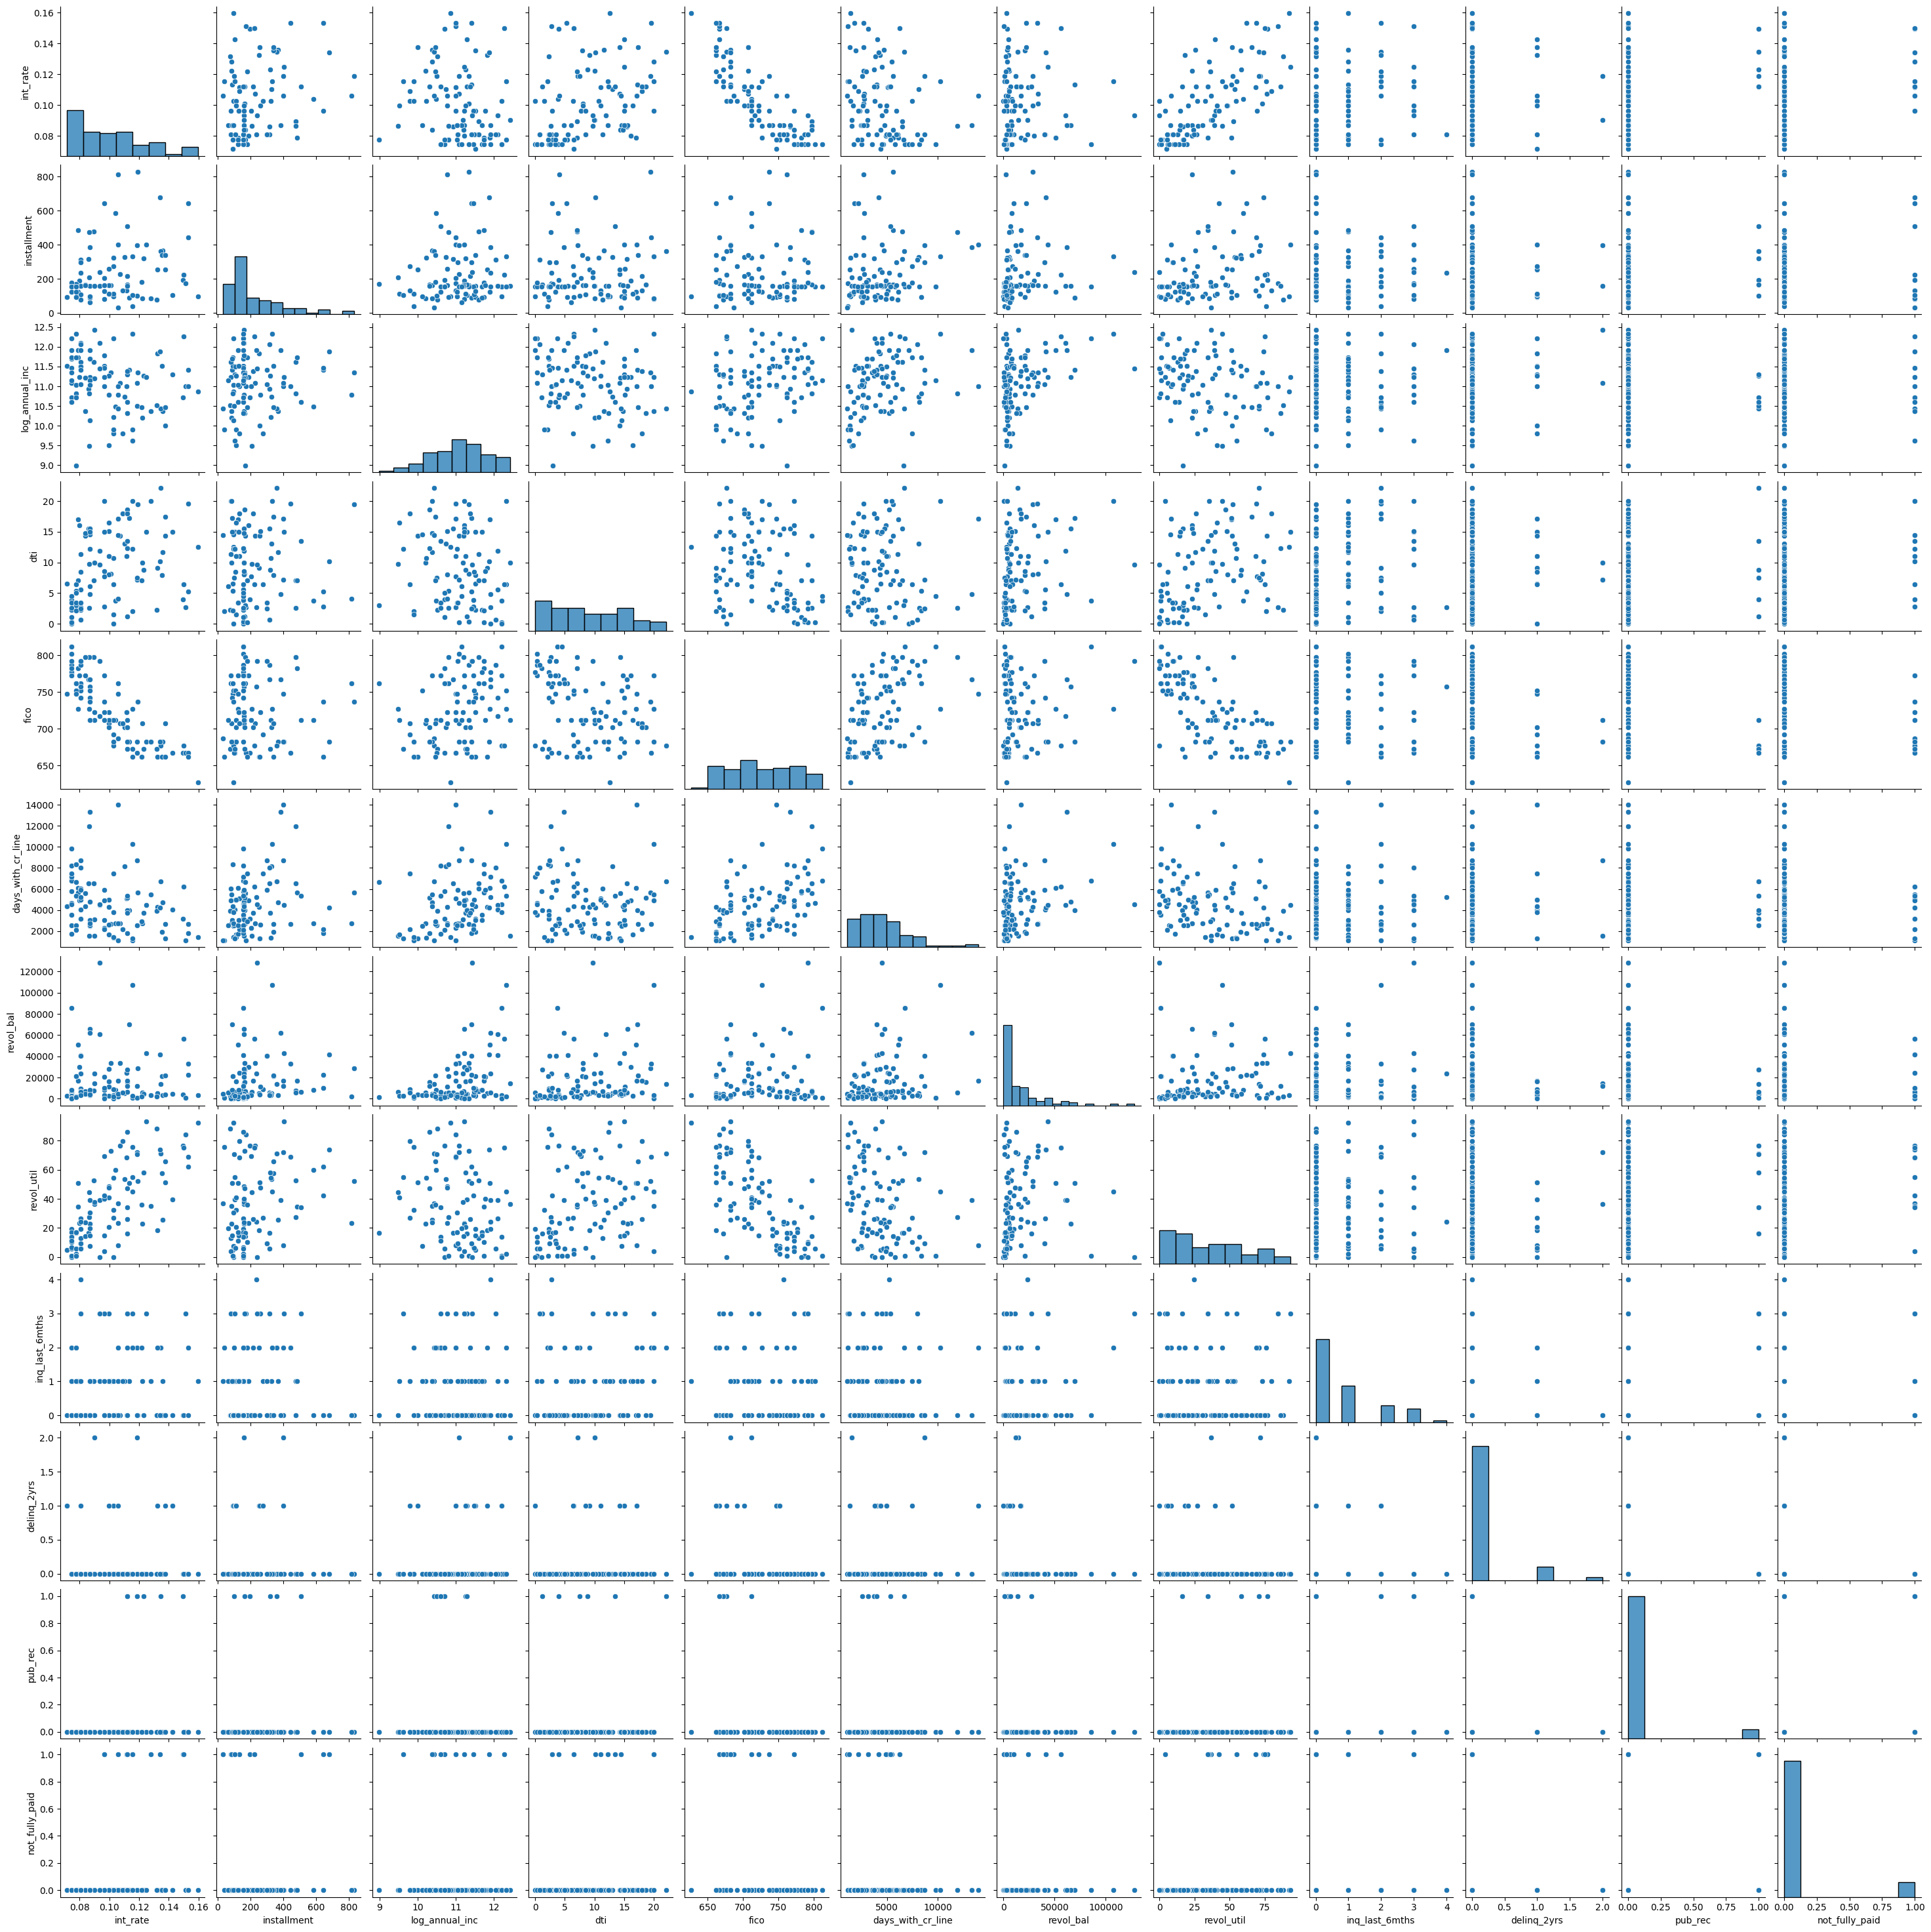

In [93]:
sns.pairplot(df)

We only need to look at the upper triangle; the pair plots below it are duplicates with the axes flipped.

#### Pair plots with significant correlations

We are going to highlight the pair plots with a correlation >= 0.2, to take a closer look. We don't include duplicates.

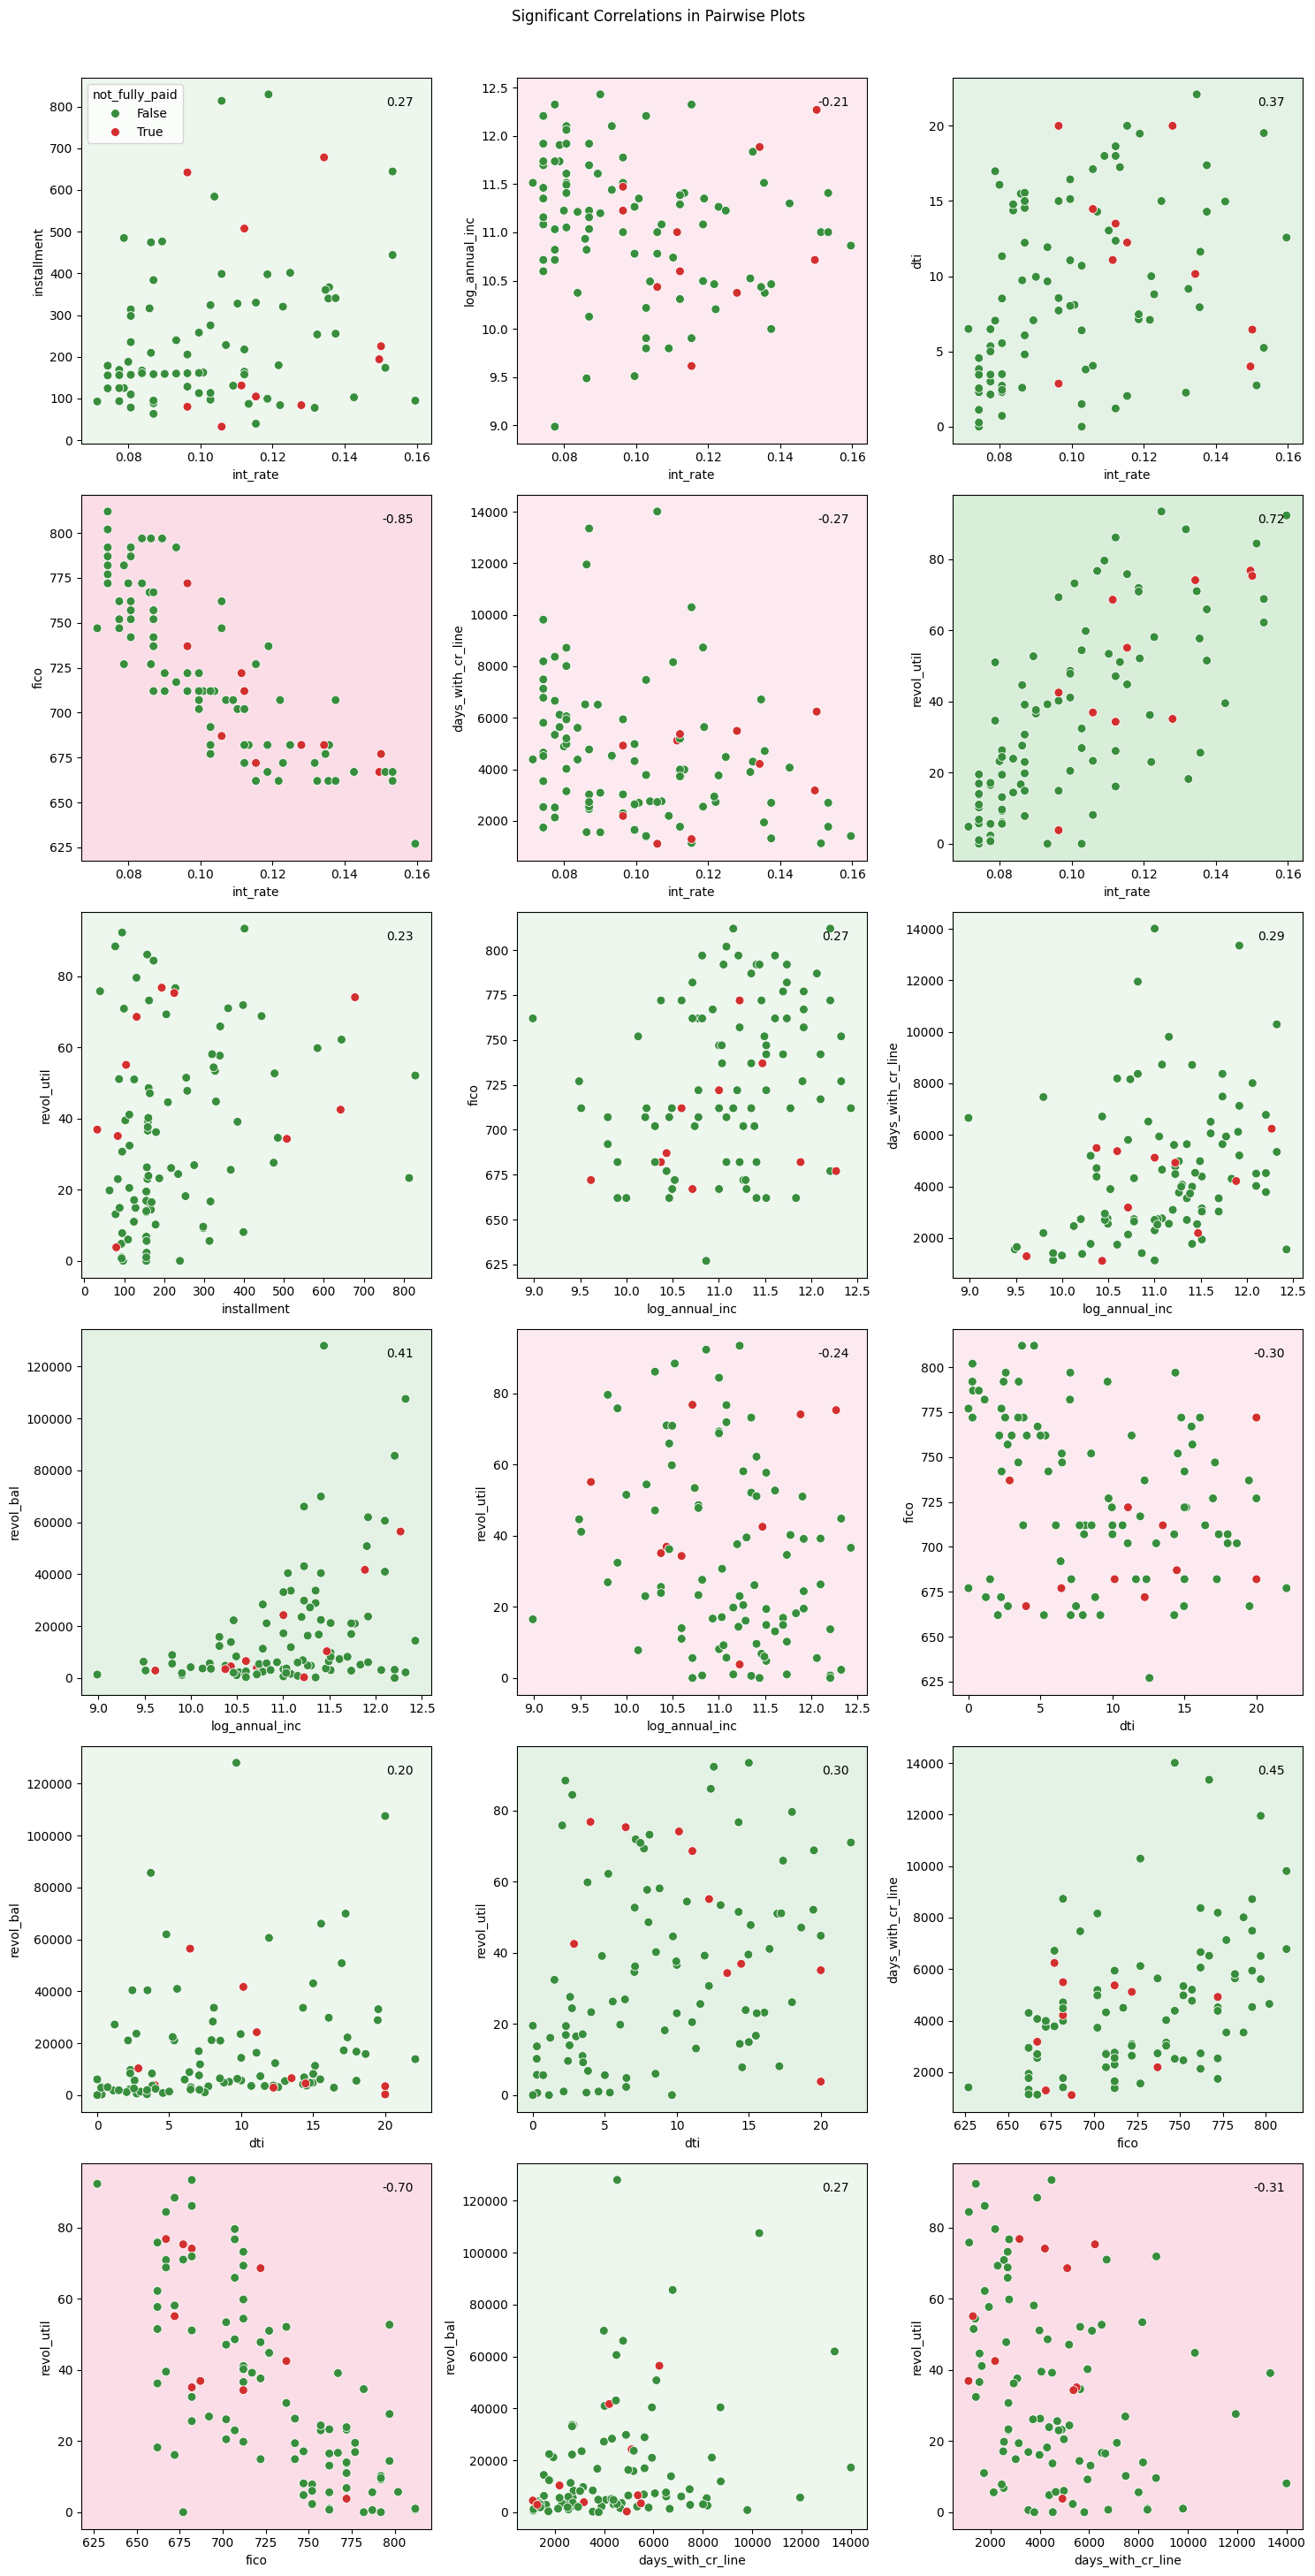

In [68]:
def get_significant_correlations(data, hue):
    # Compute the correlation matrix
    num_cols = data.select_dtypes(include=['number']).columns
    num_cols = [col for col in num_cols if col != hue]
    corr_matrix = data[num_cols].corr()

    significant_pairs = []

    # Identify significant correlations
    for i, x in enumerate(num_cols):
        for j, y in enumerate(num_cols):
            if i < j:  # Avoid redundant plotting
                corr = corr_matrix.loc[x, y]
                if abs(corr) >= 0.2:
                    significant_pairs.append((x, y, corr))

    return significant_pairs, corr_matrix

def plot_significant_correlations(data, significant_pairs, hue, palette):
    plt.style.use('default')  # Reset to default Matplotlib style

    # Define colour mapping for the dots
    dot_palette = {True: '#d32f2f', False: '#388e3c'}  # Darker red and green

    # Create a single figure to collate significant graphs
    num_plots = len(significant_pairs)
    rows = int(np.ceil(num_plots / 3))
    
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()

    # Plot significant correlations
    for i, (x, y, corr) in enumerate(significant_pairs):
        ax = axes[i]
        sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=dot_palette, ax=ax, s=50, alpha=1.0)

        # Add correlation coefficient text
        ax.text(0.95, 0.95, f'{corr:.2f}', transform=ax.transAxes,
                ha='right', va='top', fontsize=10, color='black')

        # Set the background colour based on correlation
        if corr >= 0.5:
            ax.set_facecolor('#81c784' if corr > 0 else '#ef5350')
        elif abs(corr) >= 0.3:
            ax.set_facecolor('#a5d6a7' if corr > 0 else '#f48fb1')
        else:
            ax.set_facecolor('#c8e6c9' if corr > 0 else '#f8bbd0')

        # Ensure background colour is applied consistently
        ax.patch.set_alpha(0.3)  # Light transparency

        # Remove legend from all but the first plot
        if i != 0:
            ax.get_legend().remove()

    # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.suptitle('Significant Correlations in Pairwise Plots', y=0.97)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define colour palette for 'True' and 'False'
palette = {True: '#ff9999', False: '#99ff99'}  # Pastel red and green

# Get significant correlations
significant_pairs, corr_matrix = get_significant_correlations(df, hue='not_fully_paid')

# Filter out uninformative graphs
filtered_pairs = [(x, y, corr) for x, y, corr in significant_pairs 
                  if len(df[x].unique()) > 10 and len(df[y].unique()) > 10]

# Plot the significant correlations
plot_significant_correlations(df, filtered_pairs, hue='not_fully_paid', palette=palette)

Let's analyse the findings with a correlation coefficient value of >= 0.3 for each category in `purpose`.

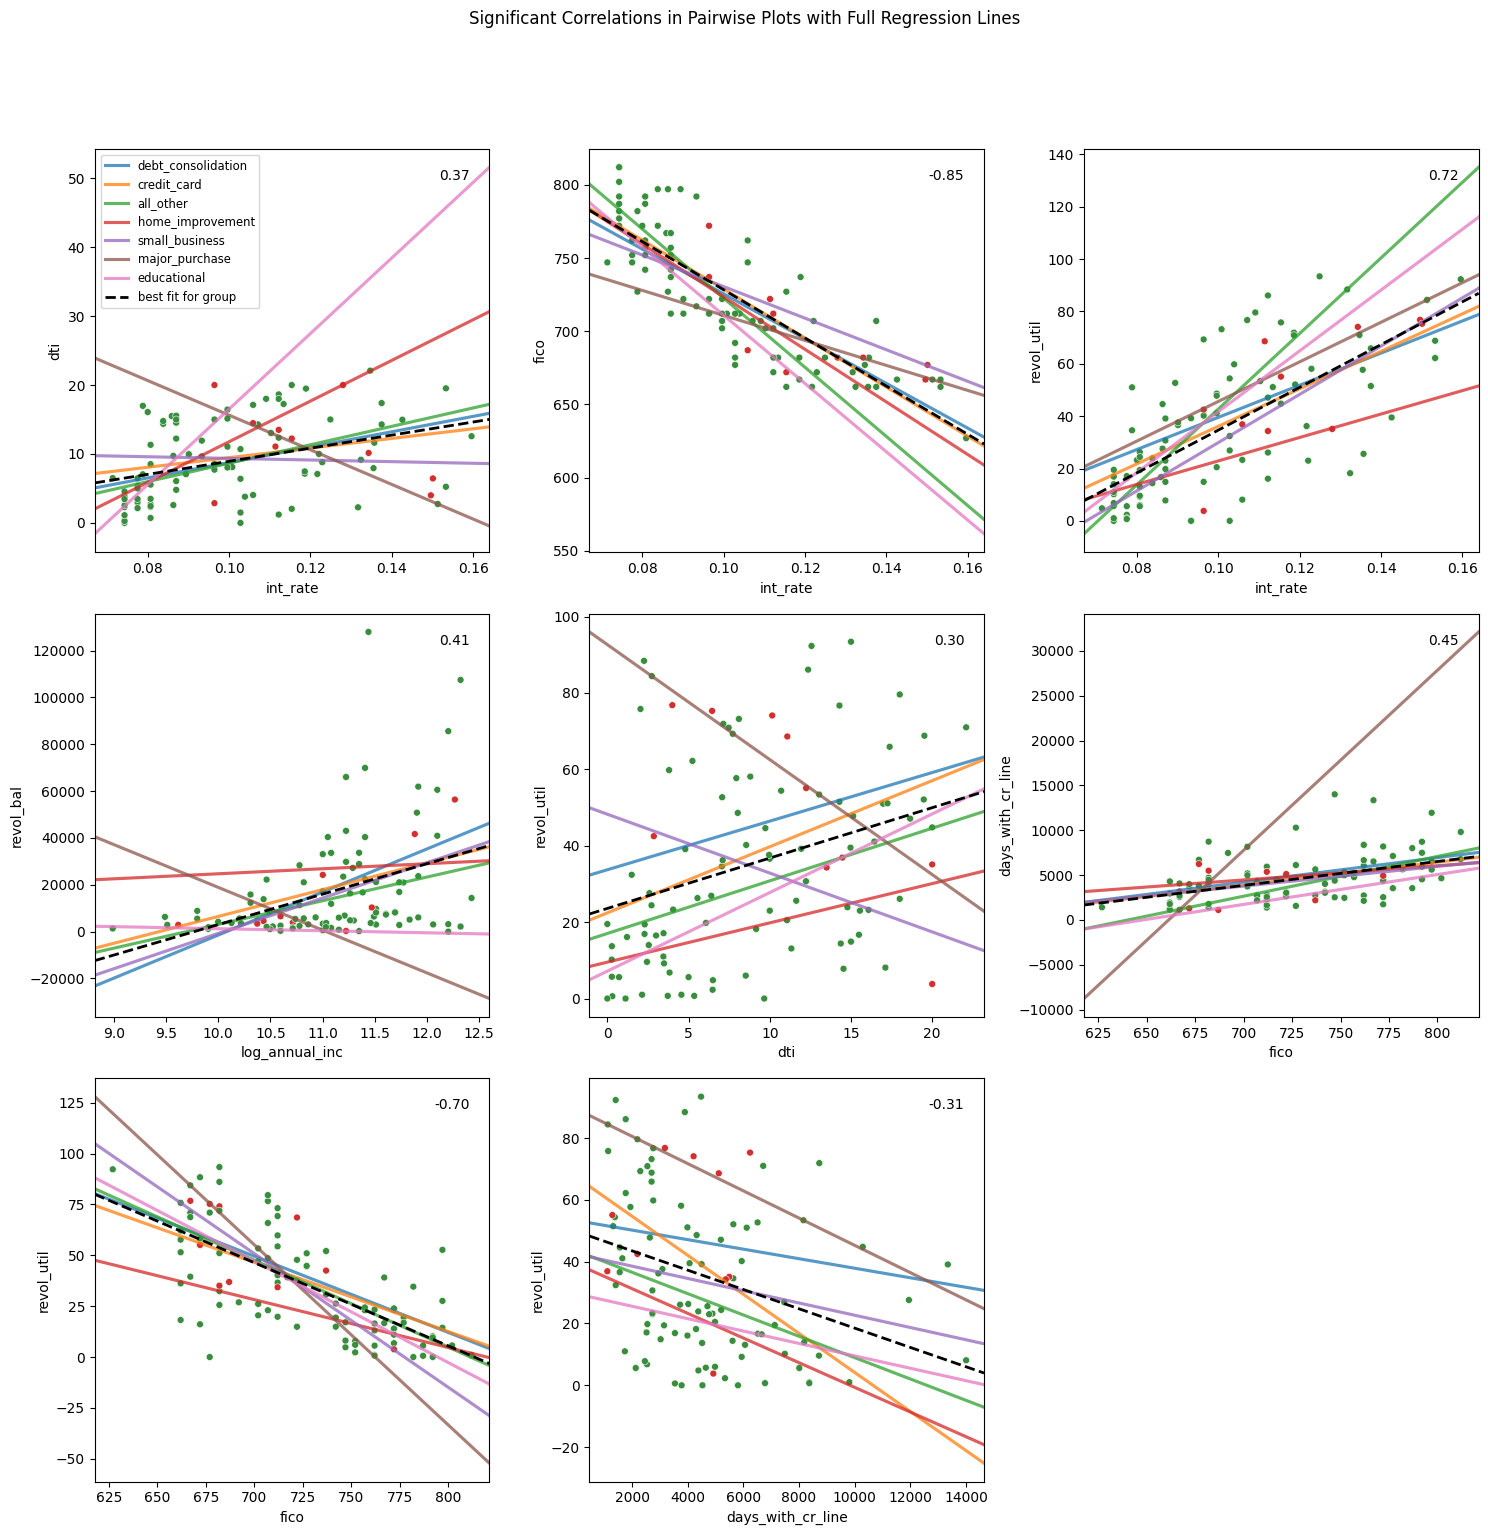

In [69]:
def plot_significant_correlations_with_full_regression(data, significant_pairs, hue, palette):
    plt.style.use('default')  # Reset to default Matplotlib style

    # Define color mapping for the dots
    dot_palette = {True: '#d32f2f', False: '#388e3c'}  # Darker red and green
    purpose_palette = sns.color_palette('tab10', n_colors=len(data['purpose'].unique()))

    # Create a single figure to collate significant graphs
    num_plots = len([pair for pair in significant_pairs if abs(pair[2]) >= 0.3])
    rows = int(np.ceil(num_plots / 3))

    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()

    plot_index = 0
    added_legend = False

    # Plot significant correlations with regression lines for abs(corr) >= 0.3
    for x, y, corr in significant_pairs:
        if abs(corr) >= 0.3:
            ax = axes[plot_index]
            sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=dot_palette, ax=ax, s=25, alpha=1.0, legend=False)

            unique_purposes = data['purpose'].unique()
            for idx, purpose in enumerate(unique_purposes):
                subset = data[data['purpose'] == purpose]
                sns.regplot(x=subset[x], y=subset[y], ax=ax, scatter=False, label=purpose, ci=None, truncate=False, 
                            color=purpose_palette[idx], line_kws={'alpha': 0.75})

            # Add the overall regression line in bold black
            sns.regplot(data=data, x=x, y=y, ax=ax, scatter=False, ci=None, truncate=False, color='black', line_kws={'linewidth': 2,  'linestyle': '--'}, label='best fit for group')

            if not added_legend:
                ax.legend(loc='best', fontsize='small')
                added_legend = True

            # Add correlation coefficient text
            ax.text(0.95, 0.95, f'{corr:.2f}', transform=ax.transAxes,
                    ha='right', va='top', fontsize=10, color='black')

            plot_index += 1

    # Hide any unused subplots
    for ax in axes[plot_index:]:
        ax.axis('off')

    plt.suptitle('Significant Correlations in Pairwise Plots with Full Regression Lines', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Use the new function to plot significant correlations with full regression lines
plot_significant_correlations_with_full_regression(df, filtered_pairs, hue='not_fully_paid', palette=palette)

### Gathering insights

Let's look at what we have so far. We will dive deeper into some interesting properties. We want to extract meaningful insights from the results and figures we have, to provide a discussion in the report. We need to remember the context of the original question: **We want to investigate the data for the factors that contribute to an entity being unable to repay a loan. The findings will be a deciding factor for whether to approve them for a loan.**

We will now relate our findings towards the context of the problem, modelling data appropriately.

#### Grouping attributes together

Target: `not_fully_paid`

Loan: `purpose`, **`int_rate`, `installment`**

Entity: **`log_annual_inc`, `dti`, `fico`**, `days_with_cr_line`, `revol_bal`, `revol_util`, `inq_last_6mths`, `delinq_2yrs`, `pub_rec`

We define an entity by the annual income they make and the debt-to-interest (DTI) ratio. We weigh them by their FICO credit score, which could provide a temporal history towards their current financial status.

#### Data modelling

In [94]:
palette = {False: 'g', True: 'r'}

Modelling the columns by logic.

In [ ]:
target = 'not_fully_paid'

# loan = [key,[control variables]]
loan = ['purpose',['int_rate','installment']]

# entity = [[primary],[secondary]]
entity = [['log_annual_inc', 'dti', 'fico'],['days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']]

# Report

The 'Achilles Heel' of the dataset is, in essense, its size. It's a small dataset, but given the process within this workbook was scaled to a real-world application, this problem would be become less of an issue.

## Suggestions for future work

This entire process could be automated. Given a larger dataset, using the values within this report as a ground truth, we could transform our findings into a classification problem. We could devlop entities (i.e. individuals, SMEs, conglomerates) based on common pattern combinations, and predict the most likely attributes of these entities. We could then use these attributes, tweaking our parameters with actual findings, to reduce error in the models. The models could then be used to predict the likelihood of entities failing to pay on their loan, and could suggest optimum values for control parameters such as `installment` and `int_rate` which would reduce the number of `not_fully_paid` outcomes returning `True`.

A suggestion for the following model types, using OOP, could be implemented for this approach:
- Entity: `log_annual_inc`, `dti`, `fico`, `public_rec`, `delinq_2yrs`, `inq_last_6mths`, `purpose` (entity.purpose)
- Type of loan: `int_rate`, `installment`, `purpose` (loanType.purpose)

With huge datasets, we could feed this information into a Neural Network to make accurate predicitons. This could be a model developed for future use by the finance team.

### Clarification of goal for future work

**Reduce the number of `not_fully_paid` outcomes.**

Given we can control the `int_rate` and `installment`. We can adjust these control variables based on the **entity attributes** as a constraint to maximise revenue whilst reducing likelihood of `not_fully_paid == True` outcomes.

# Conclusion